In [1]:
from wdlen import wordlenth
from wdlen import wdlen_mother
from nltk.corpus.reader import CHILDESCorpusReader
import nltk
import pandas as pd
import matplotlib.pyplot as plt
import slope

In [2]:
corpus_root = nltk.data.find( 'corpora/CHILDES/Dutch/')
Davis = CHILDESCorpusReader(corpus_root, 'Groningen/.*.xml')
#wdlen = wordlenth(Davis)

In [3]:
df = pd.DataFrame(wdlen).dropna()
df = df[['fname', 'age', 'one','two','three', 'four', 'five']]

In [4]:
writer = pd.ExcelWriter('Groningen.xlsx')
df.to_excel(writer,'Sheet1')
writer.save()

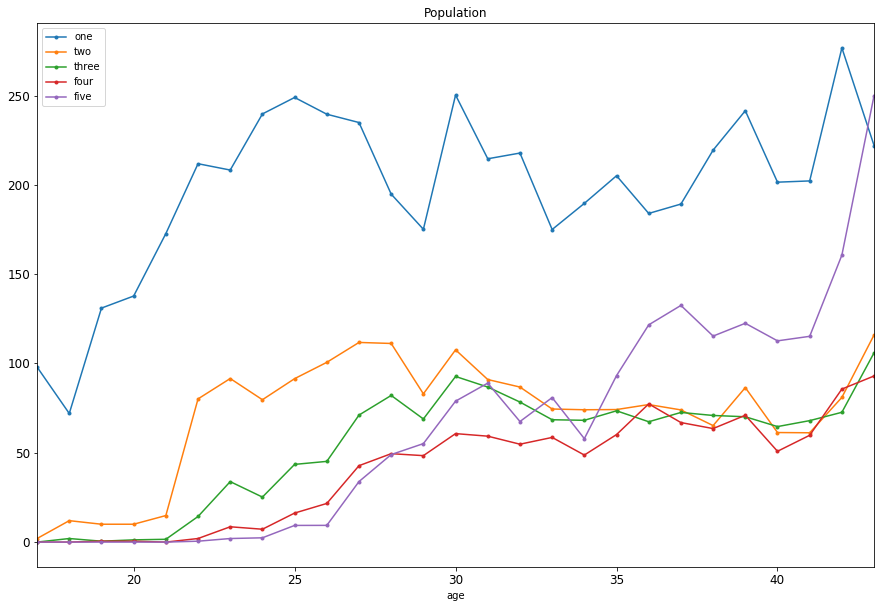

In [6]:
plt.figure()
df2 = df.groupby('age').mean().reset_index()
df2.set_index('age').plot.line(rot=0, title='Population',  style='.-', markevery=1, figsize=(15,10), fontsize=12)
plt.show()

In [7]:
df1_com = df.groupby('age').count()

In [2]:
df_age = pd.read_excel('Groningen.xlsx')

In [12]:
df2_com = df_age.groupby('age.1').count()

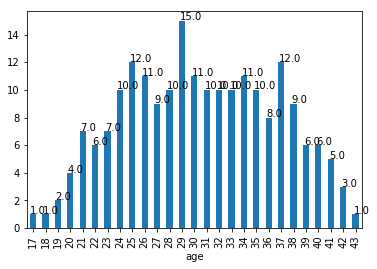

In [10]:
# Before coelescing ages
ax = df1_com['fname'].plot(kind='bar') 
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()

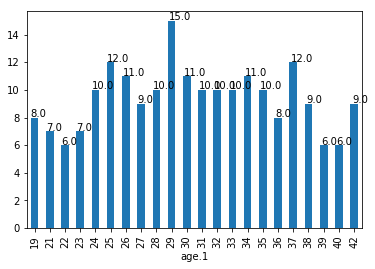

In [13]:
# After coelescing ages
ax = df2_com['fname'].plot(kind='bar') 
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()

In [3]:
df_age = df_age.drop('age', axis = 1)

In [4]:
df_ageno1 = df_age.drop('one', axis = 1)

In [5]:
df_ageno1['sum'] = df_ageno1.loc[:, 'two':'five'].sum(axis = 1)

In [6]:
df_perage = df_ageno1
df_perage.loc[:, 'two':'five'] = df_ageno1.loc[:, 'two':'five'].div(df_ageno1['sum'], axis = 0)
df_perage = df_perage.drop(['sum'], axis = 1)

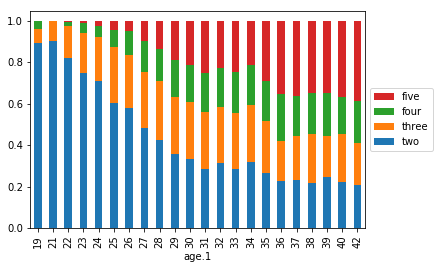

In [18]:
ax = df_perage.groupby('age.1').mean().plot.bar(legend = 'reverse', stacked = True)
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [7]:
df_mean = df_perage.groupby('age.1').mean()

point:  [19.         30.20886857 42.        ]
F1:  299.4806655498359 F2:  22.661183613419748
F seg linear:  [77.35640325]


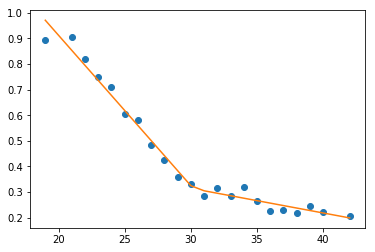

In [9]:
slope.seg_reg(df_mean) # F(4, 20)=77.356  p<.001

## plot per child

In [8]:
def per_child(df, name, group):
    ax = df.loc[df['corpus'] == name].groupby(group).mean().plot.bar(stacked = True, legend = True, title = name)
    handles, labels= ax.get_legend_handles_labels()
    ax.legend(reversed(handles), reversed(labels), loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

### Without one-word utterances but with the adjustment on ages

In [10]:
df_perage['corpus'] = df_perage.fname.str[0:-10]

In [11]:
children = df_perage.corpus.unique()

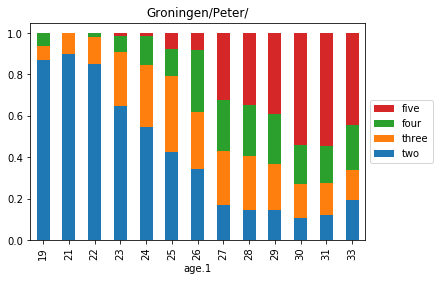

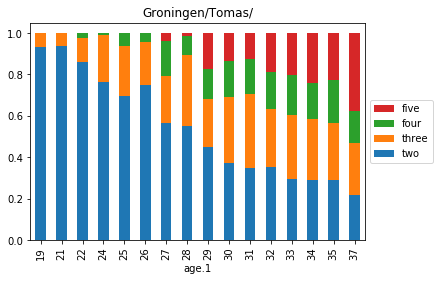

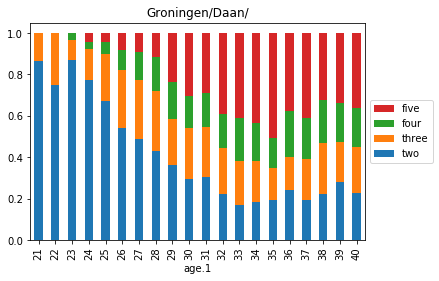

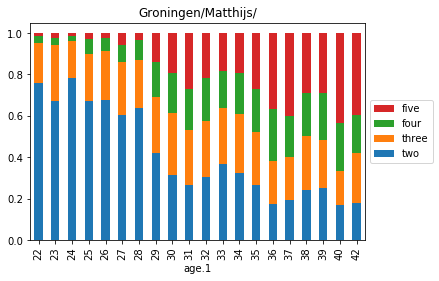

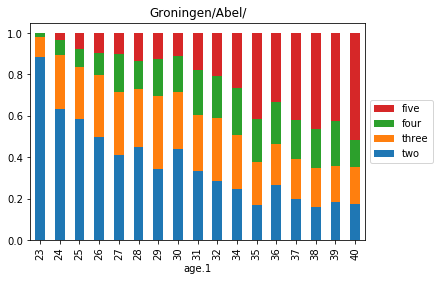

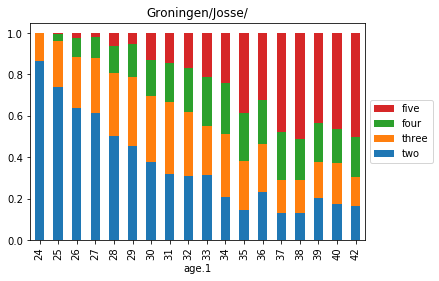

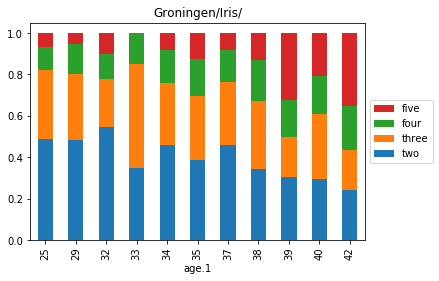

In [22]:
for child in children:
    per_child(df_perage, child, 'age.1')

point:  [19.         28.40210366 33.        ]
F1:  92.01391330372547 F2:  1.5010848546699533
F seg linear:  [11.1507867]


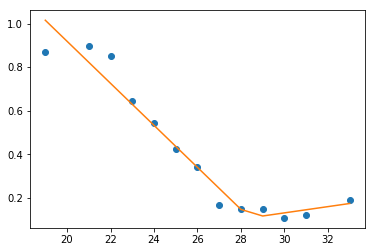

point:  [19.         31.16768661 37.        ]
F1:  155.964409136807 F2:  23.052259460607758
F seg linear:  [4.47602479]


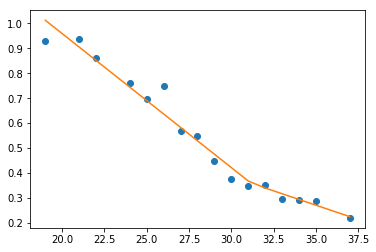

point:  [21.         32.50729368 40.        ]
F1:  187.0626909004345 F2:  7.535534855071475
F seg linear:  [46.42810313]


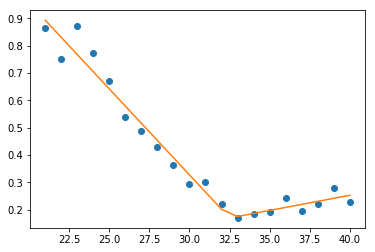

point:  [22.         31.00001288 42.        ]
F1:  34.29553750438882 F2:  11.792039757406942
F seg linear:  [6.70674918]


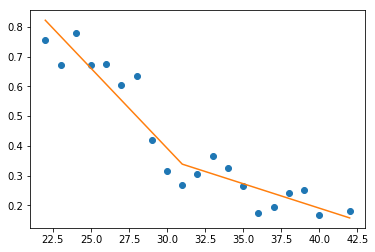

point:  [23.         25.50343499 40.        ]
F1:  6.607882883329868 F2:  75.64961989486208
F seg linear:  [16.70689644]


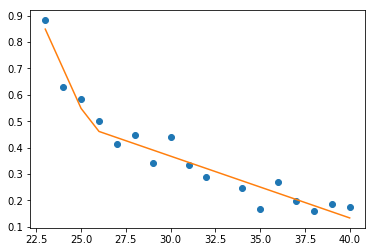

point:  [24.         31.37889336 42.        ]
F1:  331.55808315943466 F2:  5.970381858020827
F seg linear:  [27.99879734]


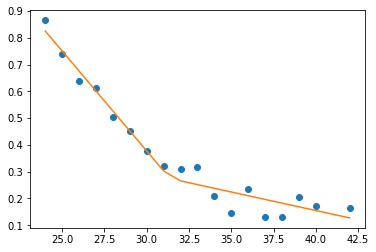

point:  [25.         36.99999992 42.        ]
F1:  1.0179823939965793 F2:  12.788658859480174
F seg linear:  [1.48548621]


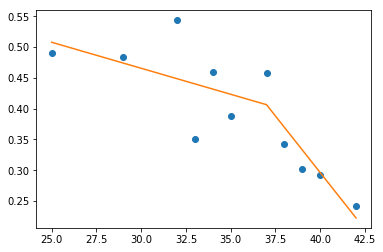

In [12]:
for child in children:
    slope.seg_reg_child(df_perage, child)

# Analyze slope difference

## Overall slope difference(after adjusting ages)

In [24]:
df_mean = df_perage.groupby('age.1').mean()

In [28]:
slope.max_slope(df_mean)

{30}

In [29]:
slope.calculate_slope(df_mean)

{22: 0.0079041309582096597,
 23: 0.010278550330323877,
 24: 0.018919335692663755,
 25: 0.030492870463257511,
 26: 0.035543310764667088,
 27: 0.042059509766069134,
 28: 0.046404645717991744,
 29: 0.04893423382470885,
 30: 0.049132549178769476,
 31: 0.047249948357661012,
 32: 0.044958186173543448,
 33: 0.041942747746141137,
 34: 0.042737874758615485,
 35: 0.042972546136567757,
 36: 0.039799586338963508,
 37: 0.036517294196986183,
 38: 0.027458872640391305}

## slope difference for each child(after adjusting ages)

In [30]:
for child in children:
    print(child, slope.max_slope_child(df_perage,child))

Groningen/Peter/ {29}
Groningen/Tomas/ {32}
Groningen/Daan/ {32}
Groningen/Matthijs/ {24}
Groningen/Abel/ {25}
Groningen/Josse/ {26}
Groningen/Iris/ {35}


# Plot adult

In [3]:
wdlen_mother = wdlen_mother(Davis)

In [4]:
df_mother = pd.DataFrame(wdlen_mother).dropna()
df_mother = df_mother[['fname', 'age', 'one','two','three', 'four', 'five']]

In [5]:
df_mother  #Each mother has her unique ID.

,fname,age,one,two,three,four,five
0,Groningen/Abel/011030.xml,23,0,0,0,0,0
1,Groningen/Abel/011112.xml,23,0,0,0,0,0
2,Groningen/Abel/011126.xml,24,0,0,0,0,0
3,Groningen/Abel/020011.xml,24,0,0,0,0,0
4,Groningen/Abel/020102.xml,25,0,0,0,0,0
5,Groningen/Abel/020116.xml,26,0,0,0,0,0
6,Groningen/Abel/020219.xml,27,0,0,0,0,0
7,Groningen/Abel/020302.xml,27,0,0,0,0,0
8,Groningen/Abel/020323.xml,28,0,0,0,0,0
9,Groningen/Abel/020409.xml,28,0,0,0,0,0


In [39]:
df_mother['sum'] = df_mother.loc[:, 'one':'five'].sum(axis = 1)

In [40]:
df_motherper = df_mother
df_motherper.loc[:, 'one':'five'] = df_mother.loc[:, 'one':'five'].div(df_mother['sum'], axis = 0)

In [41]:
df_motherper = df_motherper.drop('sum', axis = 1)

In [43]:
writer = pd.ExcelWriter('Groningen_mother.xlsx')
df_motherper.to_excel(writer,'Sheet1')
writer.save()